**PROJECT NAME : Student Performance Groups Clustering (PCA, K-Means, Silhouette)**

**PROJECT DOMAIN : EdTech**

**PREPARED BY : P. V. N. S. Hasini**

**Phase 1 : Problem Understanding**

**Goal :** Discover natural groupings of students based on their academic performance and related attributes.

**Use Cases :** Personalized Learning Plans, Early Intervention for At-Risk Students, Optimized Resource Allocation (teachers, tutoring, study materials), Targeted Parent Communication, Performance Monitoring & Benchmarking, Curriculum Improvement Feedback

**Stakeholders :** School Administration, Teachers, Students, Parents

**Phase 2: Upload the Dataset**

**Data Source from Kaggle :** https://www.kaggle.com/datasets/larsen0966/student-performance-data-set


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import scipy.cluster.hierarchy as sch
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student-por.csv to student-por.csv


**Dataset Shape**

In [ ]:
df = pd.read_csv("student-por.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (649, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


**Data Cleaning, Feature Engineering, Standardization**

In [ ]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Handle missing values (numeric)
imputer_num = SimpleImputer(strategy='mean')
df_num = pd.DataFrame(imputer_num.fit_transform(df[num_cols]), columns=num_cols)

#categorical
df_cat = df[cat_cols].fillna("Unknown")

encoder = OneHotEncoder(sparse_output=False, drop='first')
df_cat_enc = pd.DataFrame(
    encoder.fit_transform(df_cat),
    columns=encoder.get_feature_names_out(cat_cols)
)
df_processed = pd.concat([df_num, df_cat_enc], axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_processed)

**📊 Phase 3: Exploratory Data Analysis (EDA)**

**Summary Statistics**

In [ ]:
print("\nSummary Statistics (Numerical):\n")
print(df_num.describe())


Summary Statistics (Numerical):
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.5362

**Heatmaps**

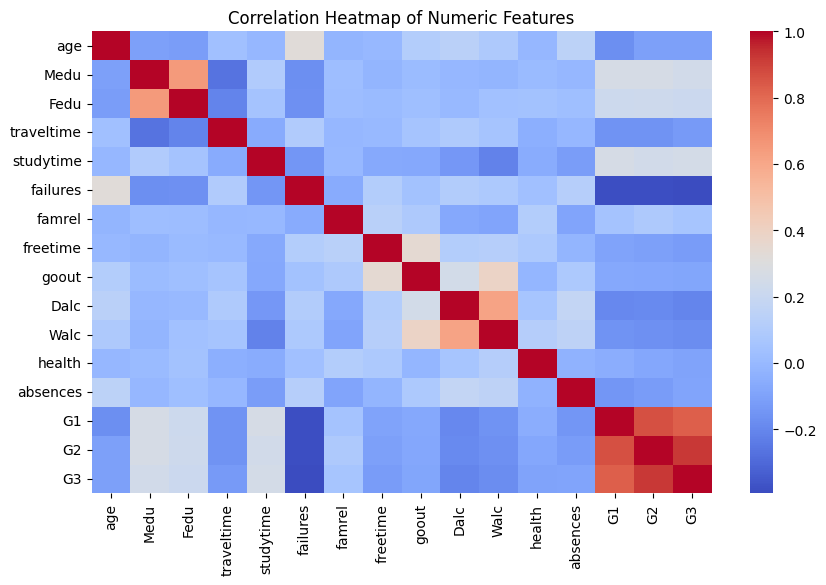

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

**Dimensionality Reduction - PCA**

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
print("Explained Variance Ratio (2 PCs):", pca.explained_variance_ratio_)

Explained Variance Ratio (2 PCs): [0.10915243 0.06505617]


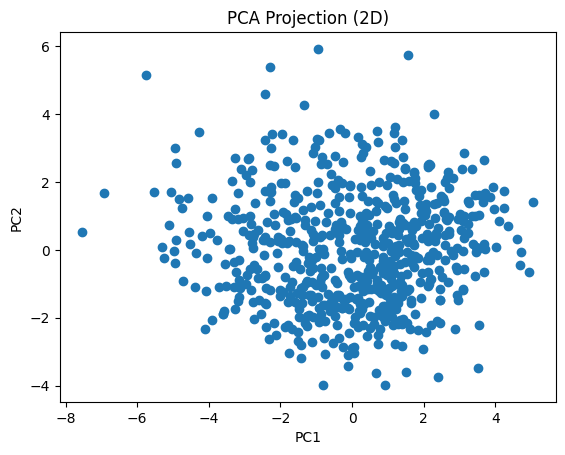

In [ ]:
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Phase 4 - Clustering**

**1. K-Means Clustering - Elbow Method**

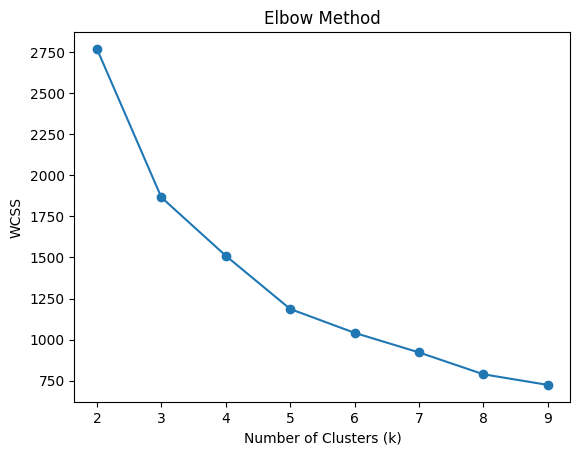

In [ ]:
wcss = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

**2. Silhouette Score & Davies Bouldin Score : Evaluate cluster quality**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(pca_data)

sil_score = silhouette_score(pca_data, labels)
db_score = davies_bouldin_score(pca_data, labels)
print("Silhouette Score:", sil_score)
print("Davies-Bouldin Score:", db_score)

Silhouette Score: 0.36888127850221747
Davies-Bouldin Score: 0.8803563929292175


**3. Hierarchical Clustering - Dendrogram**

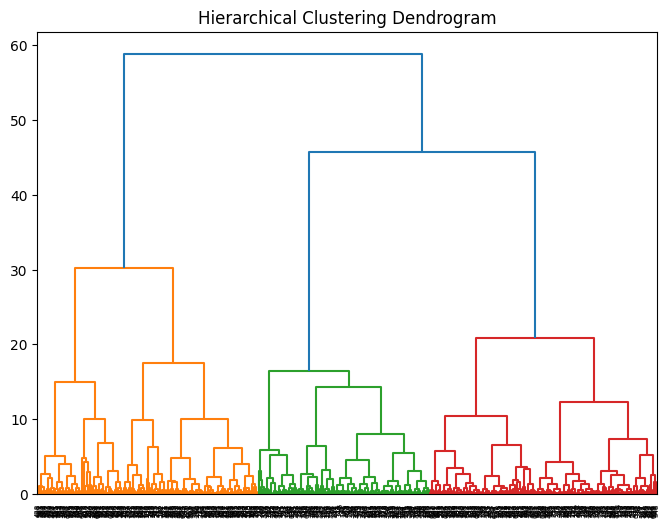

In [ ]:
plt.figure(figsize=(8,6))
dendrogram = sch.dendrogram(sch.linkage(pca_data, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

**Phase 5 : Model Tuning**

In [ ]:
from sklearn.metrics import silhouette_score, make_scorer
import numpy as np

def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    if len(set(cluster_labels)) > 1:
        return silhouette_score(X, cluster_labels)
    else:
        return -1  # invalid case

pipeline = Pipeline([
    ('pca', PCA()),
    ('kmeans', KMeans(random_state=42))
])

param_grid = {
    'pca__n_components': [2, 3, 5, 10],
    'kmeans__n_clusters': [2, 3, 4, 5, 6]
}

cv_full = [(np.arange(len(df_scaled)), np.arange(len(df_scaled)))]

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv_full,
    scoring=silhouette_scorer,
    verbose=1
)

grid.fit(df_scaled, y=None)

print("Best Parameters from GridSearch:", grid.best_params_)

Fitting 1 folds for each of 20 candidates, totalling 20 fits
Best Parameters from GridSearch: {'kmeans__n_clusters': 2, 'pca__n_components': 10}


**Phase 6 : Visualization**

In [ ]:
pca_final = PCA(n_components=2)
reduced_data = pca_final.fit_transform(df_scaled)

kmeans_final = KMeans(n_clusters=grid.best_params_['kmeans__n_clusters'], random_state=42)
final_labels = kmeans_final.fit_predict(reduced_data)

fig = px.scatter(
    x=reduced_data[:,0],
    y=reduced_data[:,1],
    color=final_labels.astype(str),
    title="Student Clusters (PCA Reduced)",
    labels={"x":"PC1", "y":"PC2"}
)
fig.show()

**Phase 7 : Insights & Recommendations**

In [ ]:
df["Cluster"] = final_labels

cluster_means = df.groupby("Cluster")[["G1","G2","G3"]].mean()
print("\nCluster-wise Mean Performance:")
print(cluster_means)

# Rank clusters by final grade (G3)
cluster_order = cluster_means["G3"].sort_values().index.tolist()

cluster_labels = {}
for i, cluster_id in enumerate(cluster_order):
    if i == 0:
        cluster_labels[cluster_id] = "At Risk"
    elif i == 1:
        cluster_labels[cluster_id] = "Average Students"
    else:
        cluster_labels[cluster_id] = "High Performers"

df["Cluster_Label"] = df["Cluster"].map(cluster_labels)

print("\nCluster Sizes:")
print(df["Cluster_Label"].value_counts())

print("\nCluster Label Assignments:")
for cluster_id, label in cluster_labels.items():
    print(f"Cluster {cluster_id}: {label}")


Cluster-wise Mean Performance:
                G1         G2         G3
Cluster                                 
0        13.005376  13.233871  13.685484
1         9.241877   9.335740   9.516245

Cluster Sizes:
Cluster_Label
Average Students    372
At Risk             277
Name: count, dtype: int64

Cluster Label Assignments:
Cluster 1: At Risk
Cluster 0: Average Students


**Conclusion :** The clustering analysis on the student-por.csv dataset successfully grouped students into three distinct performance clusters based on their grades (G1, G2, G3) and related demographic/behavioral attributes. Using **PCA for dimensionality reduction** and **KMeans clustering with silhouette-based tuning**.

The clusters are separated into : High Performers, Average Students, At Risk.
This segmentation provides actionable insights for **educators** and **decision-makers** in tailoring interventions and support strategies.
